In [1]:
import numpy as np
from scipy.special import expit as sigmoid
import igraph as ig
import random
import argparse
import os
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import pickle
from torch_geometric.data import Data
import feature_extract as fe
import pandas as pd

In [2]:
    
def visualize_dag(csv_path):
    adj_matrix = np.loadtxt(csv_path, delimiter=',')
    """Visualize the DAG using networkx and matplotlib"""
    G = nx.from_numpy_array(adj_matrix, create_using=nx.DiGraph)  
    pos = nx.spring_layout(G, k= 1.5)  
    plt.figure(figsize=(5, 5))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=1000, arrows=True)
    plt.title("DAG Visualization")
    plt.show()

def visualize_matrix(csv_path):
    adj_matrix = np.loadtxt(csv_path, delimiter=',')
    plt.figure(figsize=(5, 5))
    sns.heatmap(adj_matrix, annot=True, cmap='Blues', cbar=False)
    plt.gca().xaxis.set_label_position('top') 
    plt.gca().xaxis.tick_top()  
    plt.title('Adjacency Matrix Visualization')
    plt.show()

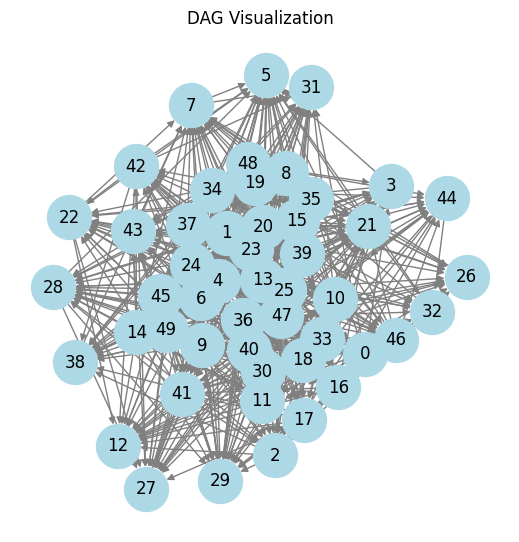

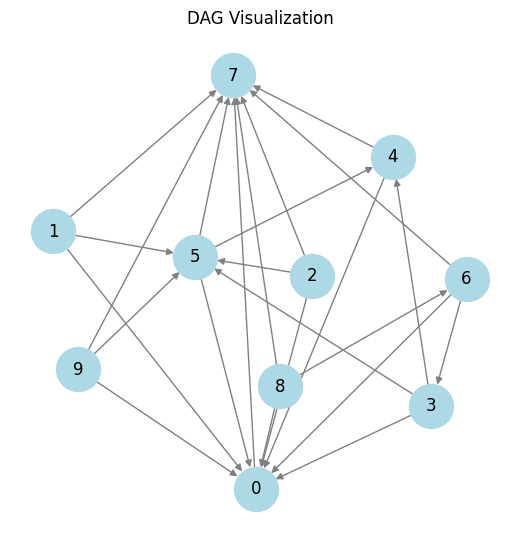

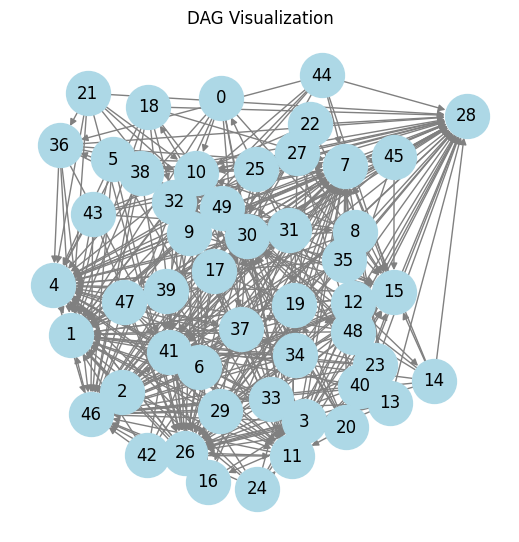

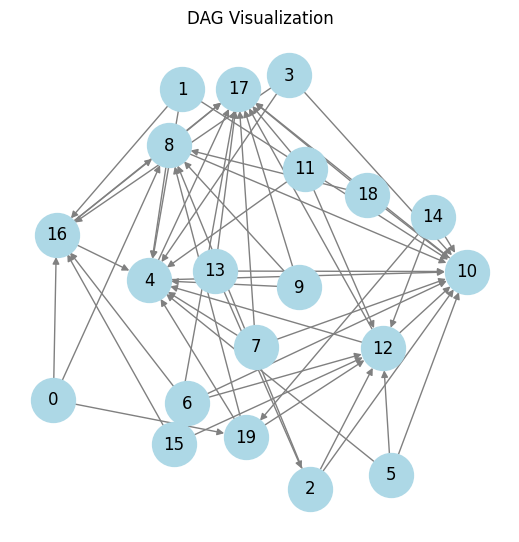

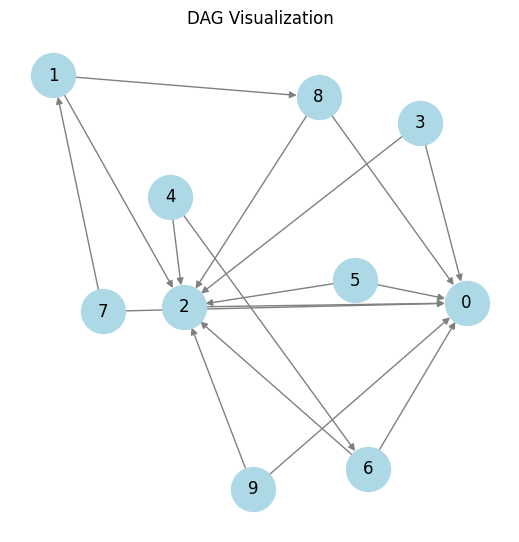

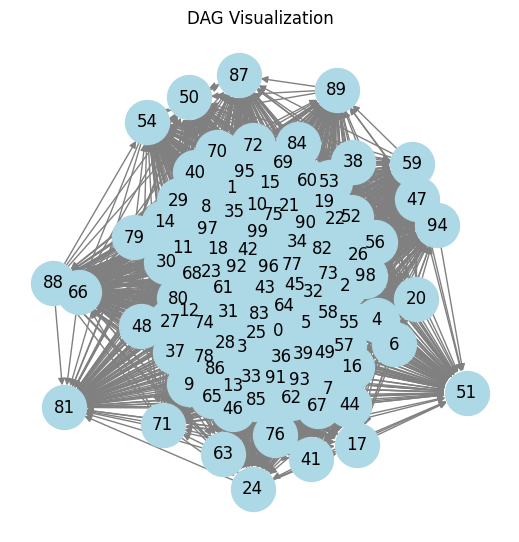

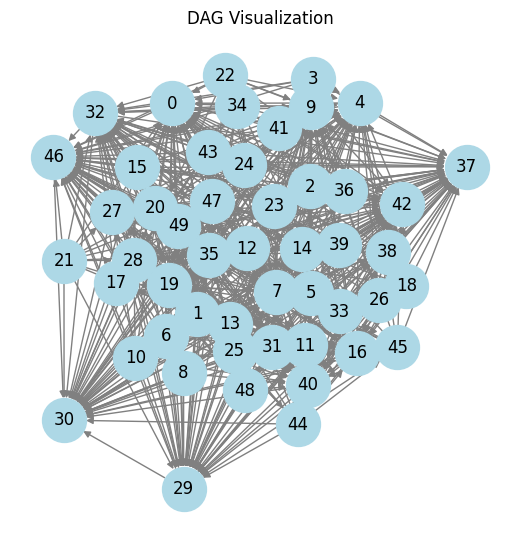

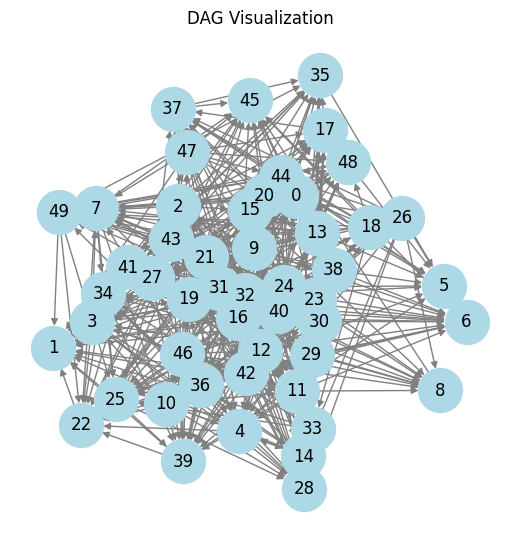

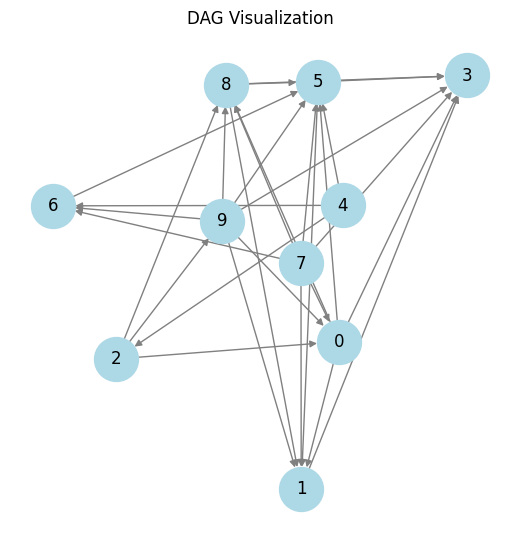

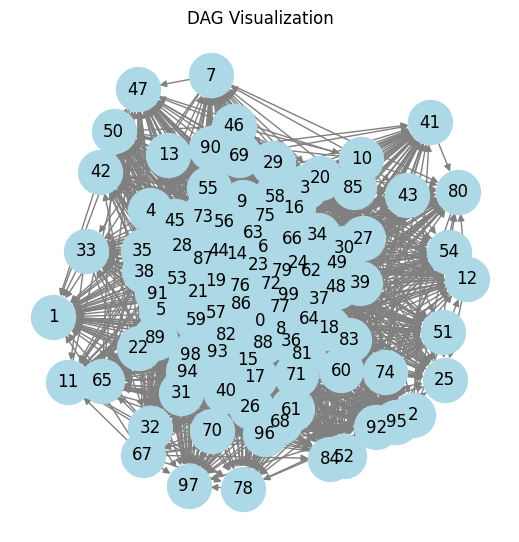

In [3]:
# folder = '/home/jina/reprod/data/new'
# for graph_list in os.listdir(folder):
#     graph_path = os.path.join(folder, graph_list)

#     for file_name in os.listdir(graph_path):
#         if file_name.startswith('B_true'):
#             file_path = os.path.join(graph_path, file_name)
#             visualize_dag(file_path)

In [4]:
# 일단 라벨은 0, 1, 2로 만들어놓고 나중에 train할 때 label을 바꾸는 방법으로 해야할 듯 
def create_data(x_path, adj_path):
    adj_array = np.loadtxt(adj_path, delimiter=',')
    true_adj = torch.from_numpy(adj_array)
    num_nodes = true_adj.size(0)

    x_pd = pd.read_csv(x_path)
    # node_features = torch.from_numpy(fe.extract_node_features(x_pd))
    # edge_features = torch.from_numpy(fe.extract_edge_features(x_pd))
    node_features = torch.from_numpy(np.nan_to_num(fe.extract_node_features(x_pd), nan=0.0))
    edge_features = torch.from_numpy(np.nan_to_num(fe.extract_edge_features(x_pd), nan=0.0))

    edge_index = torch.combinations(torch.arange(num_nodes), r=2).t()
    edge_exist = torch.nonzero(true_adj, as_tuple=False).t().contiguous()
    edge_label = torch.zeros(edge_index.size(1)) 
    for i, edge in enumerate(edge_index.t()):
        if (edge == edge_exist.t()).all(1).any():
            edge_label[i] = 1
        elif (edge.flip(0) == edge_exist.t()).all(1).any():
            edge_label[i] = 2
    # for i, edge in enumerate(edge_index.t()):
    #     if (edge == edge_exist.t()).all(1).any() or (edge.flip(0) == edge_exist.t()).all(1).any():
    #         edge_label[i] = 1
    #     else:
    #         edge_label[i] = 0
    
    data = Data(x=node_features, edge_index=edge_index, edge_attr=edge_features, y=edge_label, num_nodes=num_nodes)
    return data


def create_dataset(dir_path):
    data_list = []
    for folder in os.listdir(dir_path):
        folder_path = os.path.join(dir_path, folder)
        if os.path.isdir(folder_path):
            for file in os.listdir(folder_path):
                if file.startswith('B_true_'):
                    adj_path = os.path.join(folder_path, file)
                elif file.startswith('X_'):
                    x_path = os.path.join(folder_path, file)
            data = create_data(x_path, adj_path)
            data_list.append(data)

    return data_list
    

In [5]:

# source = '/home/jina/reprod/data/new'
# train_data = create_dataset(source)
# save_dir = '/home/jina/reprod/data/pickle'
# pkl_name = 'dense_test'
# pkl_path = os.path.join(save_dir, pkl_name)
# with open(pkl_path, 'wb') as f:
#     pickle.dump(train_data, f)

In [2]:
import pickle

pk = '/home/jina/reprod/data/pickle/train_ER2'
# pk = '/home/jina/reprod/data/pickle/train_ER'
# pk = '/home/jina/reprod/data/pickle/dense_test'
# pk = '/home/jina/reprod/data/pickle/train_1'
# pk = '/home/jina/reprod/data/pickle/new_1'
with open(pk, 'rb') as f:
    train_data = pickle.load(f)

# valid_data = train_data
pk_v = '/home/jina/reprod/data/pickle/valid_ER'
# pk_v = '/home/jina/reprod/data/pickle/valid_1'
# pk_v = '/home/jina/reprod/data/pickle/new_1'
with open(pk_v, 'rb') as f:
    valid_data = pickle.load(f)

In [3]:
train_data

[Data(x=[10, 11], edge_index=[2, 45], edge_attr=[45, 100], y=[45], num_nodes=10),
 Data(x=[100, 11], edge_index=[2, 4950], edge_attr=[4950, 100], y=[4950], num_nodes=100),
 Data(x=[10, 11], edge_index=[2, 45], edge_attr=[45, 100], y=[45], num_nodes=10),
 Data(x=[50, 11], edge_index=[2, 1225], edge_attr=[1225, 100], y=[1225], num_nodes=50),
 Data(x=[10, 11], edge_index=[2, 45], edge_attr=[45, 100], y=[45], num_nodes=10),
 Data(x=[10, 11], edge_index=[2, 45], edge_attr=[45, 100], y=[45], num_nodes=10),
 Data(x=[10, 11], edge_index=[2, 45], edge_attr=[45, 100], y=[45], num_nodes=10),
 Data(x=[10, 11], edge_index=[2, 45], edge_attr=[45, 100], y=[45], num_nodes=10),
 Data(x=[10, 11], edge_index=[2, 45], edge_attr=[45, 100], y=[45], num_nodes=10),
 Data(x=[10, 11], edge_index=[2, 45], edge_attr=[45, 100], y=[45], num_nodes=10),
 Data(x=[10, 11], edge_index=[2, 45], edge_attr=[45, 100], y=[45], num_nodes=10),
 Data(x=[10, 11], edge_index=[2, 45], edge_attr=[45, 100], y=[45], num_nodes=10),
 D

In [4]:
valid_data

[Data(x=[100, 11], edge_index=[2, 4950], edge_attr=[4950, 100], y=[4950], num_nodes=100),
 Data(x=[100, 11], edge_index=[2, 4950], edge_attr=[4950, 100], y=[4950], num_nodes=100),
 Data(x=[20, 11], edge_index=[2, 190], edge_attr=[190, 100], y=[190], num_nodes=20),
 Data(x=[20, 11], edge_index=[2, 190], edge_attr=[190, 100], y=[190], num_nodes=20),
 Data(x=[100, 11], edge_index=[2, 4950], edge_attr=[4950, 100], y=[4950], num_nodes=100),
 Data(x=[50, 11], edge_index=[2, 1225], edge_attr=[1225, 100], y=[1225], num_nodes=50),
 Data(x=[10, 11], edge_index=[2, 45], edge_attr=[45, 100], y=[45], num_nodes=10),
 Data(x=[20, 11], edge_index=[2, 190], edge_attr=[190, 100], y=[190], num_nodes=20),
 Data(x=[50, 11], edge_index=[2, 1225], edge_attr=[1225, 100], y=[1225], num_nodes=50),
 Data(x=[100, 11], edge_index=[2, 4950], edge_attr=[4950, 100], y=[4950], num_nodes=100),
 Data(x=[10, 11], edge_index=[2, 45], edge_attr=[45, 100], y=[45], num_nodes=10),
 Data(x=[20, 11], edge_index=[2, 190], edge_a

In [5]:
import torch
import torch.nn as nn
from torch_geometric.loader import DataLoader
from model import GraphSAGE
from sklearn.metrics import f1_score

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
train_ = next(iter(train_loader))
train_

DataBatch(x=[890, 11], edge_index=[2, 28305], edge_attr=[28305, 100], y=[28305], num_nodes=890, batch=[890], ptr=[33])

In [4]:
from layers import CustomSAGEConv

node_dim = train_[0].x.size(1) # 11
edge_dim = train_[0].edge_attr.size(1) # 100
x = train_.x
edge_index = train_.edge_index # [2, 15125]
edge_features = train_.edge_attr # [15125, 100]
num_nodes = train_.num_nodes # 450
# layer = CustomSAGEConv(node_dim=node_dim, edge_dim=edge_dim)
# layer(train_, train_.edge_index, train_.edge_attr, train_.num_nodes)
v = edge_index[0, :]
u = edge_index[1, :]
v_node_features = x[v]
u_node_features = x[u]

message = torch.cat([v_node_features, u_node_features, edge_features], dim=-1)
message_dim = message.size(1)
node_messages = torch.zeros((num_nodes, message_dim))

In [11]:
num_neighbor = 20

unique_v, counts_v = torch.unique(v, return_counts=True)
sampled_edges = []

for node, count in zip(unique_v, counts_v):
    neighbors_idx = (v == node).nonzero(as_tuple=False).squeeze()

    if neighbors_idx.dim() == 0:  # 이웃이 없는 경우에 대비한 처리
        neighbors_idx = neighbors_idx.unsqueeze(0)

    if count > num_neighbor:  # 이웃이 num_neighbor보다 많은 경우
        sampled_neighbors = neighbors_idx[torch.randperm(neighbors_idx.size(0))[:num_neighbor]]
        sampled_edges.append(sampled_neighbors)
    else:
        sampled_edges.append(neighbors_idx)

# 1차원 이상의 텐서만 연결
sampled_edges = [edge for edge in sampled_edges if edge.numel() > 0]
sampled_edges = torch.cat(sampled_edges)
print(sampled_edges.shape)

v = v[sampled_edges]
u = u[sampled_edges]
message = message[sampled_edges]

torch.Size([7065])


In [12]:
node_messages.index_add(0, v, message.float())
node_messages.index_add(0, u, message.float())
# num_neighbors = torch.bincount(v, minlength=num_nodes) + torch.bincount(u, minlength=num_nodes)
# print(num_neighbors)
# node_messages /= (num_neighbors.unsqueeze(1) + 1e-6)
num_neighbors = torch.bincount(v, minlength=num_nodes).clamp(max=num_neighbor) \
                + torch.bincount(u, minlength=num_nodes).clamp(max=num_neighbor)
node_messages /= (num_neighbors.unsqueeze(1) + 1e-6)

In [13]:
node_messages.shape

torch.Size([450, 122])

In [5]:
def seed_everything(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)  # if use multi-GPU
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(seed)
    random.seed(seed)

def focal_loss(logits, targets, alpha=0.25, gamma=2.0):
    bce_loss = nn.functional.binary_cross_entropy_with_logits(logits, targets, reduction='none')
    p_t = torch.exp(-bce_loss)
    focal_loss = alpha * (1 - p_t) ** gamma * bce_loss
    return focal_loss.mean()


In [6]:
import torch
import torch.nn as nn
from torch_geometric.loader import DataLoader
from model import GraphSAGE
from sklearn.metrics import f1_score
from collections import Counter

batch_size = 4
epochs = 10
num_layers = 3
lr = 0.0001
num_neighbor = 2
threshold = 0.49
seed_everything(47)

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_data, batch_size=batch_size, shuffle=True)

loader_type = {
    "train": train_loader,
    "test": valid_loader
}

node_dim = train_data[0].x.size(1)
edge_dim = train_data[0].edge_attr.size(1)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = 'cpu'
model = GraphSAGE(node_dim, edge_dim, num_layers=num_layers, output_class=2, device=device, num_samples=num_neighbor).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
# criterion = nn.CrossEntropyLoss() 

best_test_f1 = 0
best_test_acc = 0
best_test_loss = 9999


for epoch in range(epochs):

    for mode in ["train", "test"]:
        running_loss = 0
        running_acc = 0
        total_samples = 0
        all_predictions = []
        all_labels = []

        if mode == 'train':
            model.train()
        elif mode == 'test':
            model.eval()
        
        for data in loader_type[mode]:
         
            data.x = data.x.float()
            data.y = data.y.long()

            data.y[data.y == 2] = 1

            class_counts = Counter(data.y.numpy())
            print(class_counts)
            # total_count = sum(class_counts.values())
            # print(total_count)
            # class_weights = {cls: total_count / count for cls, count in class_counts.items()}
            # weights = torch.tensor([class_weights[cls] for cls in range(3)], dtype=torch.float).to(device)

            data = data.to(device)

            optimizer.zero_grad()

            with torch.set_grad_enabled(mode == 'train'):
                logits = model(data)
                if epoch == 9:
                    print(torch.sigmoid(logits))
                preds = (torch.sigmoid(logits) > threshold).float()
                # pos_weight = torch.tensor([3.0]).to(device)
                # loss = focal_loss(logits, data.y.view(-1, 1).float())
                loss = nn.BCEWithLogitsLoss()(logits, data.y.view(-1, 1).float())
                # loss = nn.CrossEntropyLoss()(logits, data.y)
                # loss = nn.CrossEntropyLoss(weight=weights)(logits, data.y)
                # loss = F1Loss(classes=3)(logits, data.y)
                # loss = WeightedF1Loss(classes=3)(logits, data.y, class_weights=weights)
                
                # _, preds = torch.max(logits, 1)

                if mode == 'train':
                    loss.backward()
                    # 각 파라미터의 기울기를 출력
                    # print(f"Epoch {epoch}: Gradients")
                    # for name, param in model.named_parameters():
                    #     if param.grad is not None:
                    #         print(f"  Layer: {name} | Gradient Mean: {param.grad.mean()} | Gradient Std: {param.grad.std()}")
    
                    optimizer.step()


                all_predictions.extend(preds.cpu().numpy())
                all_labels.extend(data.y.cpu().numpy())

            running_loss += loss.item() * data.y.size(0)
            # print(torch.sum(preds == data.y), data.y.size(0))
            # running_acc += torch.sum(preds == data.y).item()
            running_acc += torch.sum(preds.squeeze() == data.y).item()
            total_samples += data.y.size(0)

        epoch_loss = running_loss / total_samples
        epoch_acc = running_acc / total_samples
        epoch_f1 = f1_score(all_labels, all_predictions, average='macro')
        print(f'epoch: {epoch+1}, {mode} loss: {epoch_loss:.3f}, acc: {epoch_acc:.3f} f1: {epoch_f1:.3f}\n')

        if mode == 'test' and best_test_f1 < epoch_f1:
            best_test_f1 = epoch_f1

        if mode == 'test' and best_test_acc < epoch_acc:
            best_test_acc = epoch_acc

        if mode == 'test' and best_test_loss > epoch_loss:
            # file_name = f'epoch{epoch+1:04d}_{str(epoch_loss)[:5].replace(".","")}'
            # save_model(model, saved_dir, f'{file_name}.pth')
            best_test_loss = epoch_loss

print("training end!!")
print(f"best f1: {best_test_f1}, best acc: {best_test_acc}, best loss: {best_test_loss}")

Counter({np.int64(1): 178, np.int64(0): 147})
Counter({np.int64(1): 173, np.int64(0): 152})
Counter({np.int64(1): 2758, np.int64(0): 2472})
Counter({np.int64(0): 852, np.int64(1): 653})
Counter({np.int64(1): 3747, np.int64(0): 1483})
Counter({np.int64(0): 3231, np.int64(1): 3034})
Counter({np.int64(1): 1134, np.int64(0): 371})
Counter({np.int64(1): 5661, np.int64(0): 4329})
Counter({np.int64(1): 3672, np.int64(0): 1558})
Counter({np.int64(1): 5749, np.int64(0): 4386})
Counter({np.int64(1): 1097, np.int64(0): 408})
Counter({np.int64(0): 778, np.int64(1): 727})
Counter({np.int64(0): 1337, np.int64(1): 1203})
Counter({np.int64(1): 6967, np.int64(0): 5383})
Counter({np.int64(0): 3067, np.int64(1): 2163})
Counter({np.int64(1): 3706, np.int64(0): 2849})
Counter({np.int64(1): 209, np.int64(0): 116})
Counter({np.int64(1): 3042, np.int64(0): 2043})
Counter({np.int64(1): 3811, np.int64(0): 3634})
Counter({np.int64(1): 10287, np.int64(0): 4608})
Counter({np.int64(1): 922, np.int64(0): 728})
Count

In [7]:
for a, b in zip(all_predictions, all_labels):
    print(a, b)

[1.] 1
[1.] 0
[1.] 0
[1.] 1
[1.] 1
[1.] 1
[1.] 0
[1.] 1
[1.] 0
[1.] 1
[1.] 1
[1.] 0
[1.] 0
[1.] 1
[1.] 1
[1.] 0
[1.] 1
[1.] 0
[1.] 0
[1.] 0
[1.] 1
[1.] 1
[1.] 1
[1.] 1
[1.] 0
[1.] 1
[1.] 0
[1.] 0
[1.] 1
[1.] 1
[1.] 1
[1.] 0
[1.] 1
[1.] 1
[1.] 1
[1.] 1
[1.] 1
[1.] 0
[1.] 1
[1.] 0
[1.] 1
[1.] 1
[1.] 0
[1.] 1
[1.] 0
[1.] 1
[1.] 1
[1.] 1
[1.] 1
[1.] 1
[1.] 0
[1.] 0
[1.] 0
[1.] 1
[1.] 1
[1.] 0
[1.] 0
[1.] 1
[1.] 0
[1.] 1
[1.] 1
[1.] 1
[1.] 0
[1.] 1
[1.] 0
[1.] 1
[1.] 0
[1.] 0
[1.] 1
[1.] 0
[1.] 0
[1.] 1
[1.] 0
[1.] 1
[1.] 0
[1.] 1
[1.] 1
[1.] 1
[1.] 0
[1.] 0
[1.] 1
[1.] 0
[1.] 1
[1.] 1
[1.] 0
[1.] 0
[1.] 0
[1.] 1
[1.] 1
[1.] 0
[1.] 1
[1.] 0
[1.] 1
[1.] 0
[1.] 0
[1.] 0
[1.] 1
[1.] 0
[1.] 1
[1.] 0
[1.] 1
[1.] 1
[1.] 1
[1.] 1
[1.] 0
[1.] 0
[1.] 0
[1.] 0
[1.] 1
[1.] 1
[1.] 0
[1.] 1
[1.] 0
[1.] 1
[1.] 0
[1.] 1
[1.] 1
[1.] 1
[1.] 0
[1.] 1
[1.] 0
[1.] 0
[1.] 1
[1.] 1
[1.] 0
[1.] 1
[1.] 0
[1.] 1
[1.] 1
[1.] 1
[1.] 1
[1.] 1
[1.] 1
[1.] 1
[1.] 1
[1.] 0
[1.] 0
[1.] 1
[1.] 1
[1.] 1
[1.] 1
[1.] 1
[1.] 1